<a href="https://colab.research.google.com/github/addo561/learning-pytorch/blob/main/Sentiment_analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
!pip install -U torch==2.3.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -U torchtext==0.18


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.4 MB/s eta 0:00:00


In [ ]:
import collections

import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm


In [ ]:
seed = 1234

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
train_data, test_data = datasets.load_dataset("imdb", split=["train", "test"])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
from torchtext.data import get_tokenizer
tokenizer = get_tokenizer("basic_english")


/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [ ]:
def tokenize_example(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    length = len(tokens)
    return {"tokens": tokens, "length": length}



In [ ]:
max_length = 256

train_data = train_data.map(
    tokenize_example, fn_kwargs={"tokenizer": tokenizer, "max_length": max_length}
)
test_data = test_data.map(
    tokenize_example, fn_kwargs={"tokenizer": tokenizer, "max_length": max_length}
)


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'length': Value(dtype='int64', id=None)}

In [ ]:
test_size = 0.25

train_valid_data = train_data.train_test_split(test_size=test_size)
train_data = train_valid_data["train"]
valid_data = train_valid_data["test"]


In [ ]:
len(train_data),len(valid_data)

(18750, 6250)

In [ ]:
from torchtext.vocab import build_vocab_from_iterator
min_freq = 5
special_tokens = ['<unk>','<pad>']

vocab = build_vocab_from_iterator(
    train_data['tokens'],
    min_freq= min_freq,
    specials= special_tokens
)


/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [ ]:
len(vocab)

21635

In [ ]:
vocab.get_itos()[:5]

['<unk>', '<pad>', 'the', '.', ',']

In [ ]:
unk_index = vocab['<unk>']
pad_index = vocab['<pad>']

In [ ]:
vocab.set_default_index(unk_index)

In [ ]:
def numericalize(example,vocab):
  idx = vocab.lookup_indices(example['tokens'])
  return {'idx':idx}

In [ ]:
train_data = train_data.map(numericalize,fn_kwargs={'vocab':vocab})
valid_data = valid_data.map(numericalize,fn_kwargs={'vocab':vocab})
test_data = test_data.map(numericalize,fn_kwargs={'vocab':vocab})



Map:   0%|          | 0/18750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'length': Value(dtype='int64', id=None),
 'idx': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

In [ ]:
train_data = train_data.with_format(type='torch',columns=['label','length','idx'])
valid_data = valid_data.with_format(type='torch',columns=['label','length','idx'])
test_data = test_data.with_format(type='torch',columns=['label','length','idx'])

In [ ]:
train_data[0]

{'label': tensor(1),
 'length': tensor(135),
 'idx': tensor([  180,     4,    14,    10,   191,   841,    34,     7,     2,   121,
            98,   816,    50,     8,  1516,     2,   380,     7,     2,   184,
             3,     8,   805,    14,    18,    10,     8,   805,  2246,   429,
             3,    12,   347,    15,     2,   388,  1025,     9,    16,    76,
             5,    64,     7, 11198,     3,     2,  9212,    17,   761,     4,
          7812,  5460,   198,    37,     4,     6,  3653,  3683,    17,   226,
             5, 11893,     3,    53,     7,    15,  3310,   354,     5,   689,
             4,     0,  5471,     3,  2706,  3826,     9,    16,   246,    13,
            14,    18,  1111,    33,    17,   126,   188,     8,    35,   597,
           181,    19,     5,    34,  3942,  1381,    13,     2,  5370,     3,
            32,  4228,    10,    41,  2825,     8,    37,     3,     2,  4411,
          1141,   213,  2655,     6, 16946,  3729,   590,  4845,     8,  2416,


In [ ]:
def get_collate_fn(pad_index):
  def collate_fn(batch):
    batch_idx = [i['idx'] for i in batch]
    batch_idx = nn.utils.rnn.pad_sequence(
        batch_idx,
        padding_value = pad_index,
        batch_first=True,

    )
    batch_length = [i['length'] for i in batch]
    batch_length = torch.stack(batch_length)
    batch_label = [i['label'] for i in batch]
    batch_label = torch.stack(batch_label)
    batch = {"idx": batch_idx, "length": batch_length, "label": batch_label}
    return batch
  return collate_fn


In [ ]:

def get_data_loader(dataset, batch_size, pad_index, shuffle=False):
    collate_fn = get_collate_fn(pad_index)
    data_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=shuffle,
    )
    return data_loader



In [ ]:

batch_size = 512

train_data_loader = get_data_loader(train_data, batch_size, pad_index, shuffle=True)
valid_data_loader = get_data_loader(valid_data, batch_size, pad_index)
test_data_loader = get_data_loader(test_data, batch_size, pad_index)



In [ ]:
class LSTM(nn.Module):
  def __init__(self,
               vocab_size,
               embedding_dim,
               hidden,
               output,
               layers,
               dropout_rate,
               pad_index,
               bidirectional):
    super(LSTM,self).__init__()
    self.embedding = nn.Embedding(vocab_size,embedding_dim,padding_idx=pad_index)
    self.lstm = nn.LSTM(
       embedding_dim,
       hidden_size=hidden,
       num_layers=layers,
       batch_first=True,
       bidirectional=bidirectional,
       dropout=dropout_rate

    )
    self.fc = nn.Linear(hidden*2 if bidirectional else hidden,output)
    self.dropout = nn.Dropout(dropout_rate)

  def forward(self,idx,length):
    #batch_size,seq_len,hidden,embedding_dim,out ,layers-> b,s,h,e,o,l
    #idx -> [b,s]
    # len -> [b]
    embedding= self.dropout(self.embedding(idx))#-> [b,s,e]

    packed_embedding = nn.utils.rnn.pack_padded_sequence(
        embedding,length,batch_first=True,enforce_sorted=False
    )
    packed_output, (hidden, cell) = self.lstm(packed_embedding)
    #hidden -> [l* n direction,b,h]
    #cell ->  [l* n direction,b,h]
    output, output_length = nn.utils.rnn.pad_packed_sequence(packed_output)
    # output = [b, s, h* n directions]

    if self.lstm.bidirectional:
        hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
            # hidden = [b , h * 2]
    else:
        hidden = self.dropout(hidden[-1])
        # hidden = [b, h]
    prediction = self.fc(hidden)
    # prediction = [b ,o]
    return prediction




In [ ]:
pad_index = int(pad_index)

In [ ]:
vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 300
output_dim = len(train_data.unique("label"))
n_layers = 2
bidirectional = True
dropout_rate = 0.5

model = LSTM(
    vocab_size,
    embedding_dim,
    hidden_dim,
    output_dim,
    n_layers,
    bidirectional=bidirectional,
    dropout_rate=dropout_rate,
    pad_index=pad_index,
)


In [ ]:
def count_param(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(count_param(model))

10101302


In [ ]:
def initialize_weights(m):
  if isinstance(m,nn.Linear):
    nn.init.xavier_normal_(m.weight)
    nn.init.zeros_(m.bias)
  elif isinstance(m, nn.LSTM):
    for name,param in m.named_parameters():
      if 'bias' in name:
        nn.init.zeros_(param)
      elif 'weigth' in name:
        nn.init.orthogonal_(param)

In [ ]:
model.apply(initialize_weights)


LSTM(
  (embedding): Embedding(21635, 300, padding_idx=1)
  (lstm): LSTM(300, 300, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=600, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
vectors = torchtext.vocab.GloVe()
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())

.vector_cache/glove.840B.300d.zip: 2.18GB [06:49, 5.31MB/s]                            
100%|█████████▉| 2196016/2196017 [05:01<00:00, 7284.36it/s]


In [ ]:
model.embedding.weight.data = pretrained_embedding

In [ ]:
model.embedding.weight

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
        ...,
        [ 0.1662,  0.2845,  0.4958,  ..., -0.5733, -0.4675, -0.0965],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2701,  0.6335,  0.2016,  ..., -0.4568,  0.5783, -0.5545]],
       requires_grad=True)

In [ ]:
pretrained_embedding

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
        ...,
        [ 0.1662,  0.2845,  0.4958,  ..., -0.5733, -0.4675, -0.0965],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2701,  0.6335,  0.2016,  ..., -0.4568,  0.5783, -0.5545]])

In [ ]:
lr = 5e-4

optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [ ]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [ ]:
model = model.to(device)
criterion = criterion.to(device)


In [ ]:
def train(model,data_loader,criterion,optimizer,device):
  model.train()
  epoch_loss = []
  epoch_acc = []
  for batch in tqdm.tqdm(data_loader,desc='training...'):
    X,l,y = batch['idx'].to(device),batch['length'],batch['label'].to(device)
    pred = model(X,l)
    loss = criterion(pred,y)
    accuracy = get_accuracy(pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss.append(loss.item())
    epoch_acc.append(accuracy.item())
  return np.mean(epoch_loss),np.mean(epoch_acc)

def evaluate(model,data_loader,criterion,device):
  model.eval()
  epoch_loss = []
  epoch_acc = []
  for batch in tqdm.tqdm(data_loader,desc='testing...'):
    with torch.inference_mode():
      X,l,y = batch['idx'].to(device),batch['length'],batch['label'].to(device)
      pred = model(X,l)
      loss = criterion(pred,y)
      accuracy = get_accuracy(pred,y)
      epoch_loss.append(loss.item())
      epoch_acc.append(accuracy.item())
  return np.mean(epoch_loss),np.mean(epoch_acc)




In [ ]:
def get_accuracy(pred,label):
  batch_sz,_= pred.shape
  pred_classes = pred.argmax(dim=-1)
  return (pred_classes.eq(label).sum())/batch_sz

In [ ]:
n_epochs = 10
best_valid_loss = float("inf")

metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        model,train_data_loader,  criterion, optimizer, device
    )
    valid_loss, valid_acc = evaluate(model,valid_data_loader, criterion, device)
    metrics["train_losses"].append(train_loss)
    metrics["train_accs"].append(train_acc)
    metrics["valid_losses"].append(valid_loss)
    metrics["valid_accs"].append(valid_acc)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "lstm.pt")
    print(f"epoch: {epoch}")
    print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
    print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")



testing...: 100%|██████████| 13/13 [00:03<00:00,  3.87it/s]


epoch: 0
train_loss: 0.379, train_acc: 0.835
valid_loss: 0.341, valid_acc: 0.851


testing...: 100%|██████████| 13/13 [00:03<00:00,  3.81it/s]


epoch: 1
train_loss: 0.340, train_acc: 0.859
valid_loss: 0.372, valid_acc: 0.858


testing...: 100%|██████████| 13/13 [00:03<00:00,  3.73it/s]


epoch: 2
train_loss: 0.301, train_acc: 0.877
valid_loss: 0.303, valid_acc: 0.872


testing...: 100%|██████████| 13/13 [00:03<00:00,  3.74it/s]


epoch: 3
train_loss: 0.277, train_acc: 0.888
valid_loss: 0.366, valid_acc: 0.870


testing...: 100%|██████████| 13/13 [00:03<00:00,  3.71it/s]


epoch: 4
train_loss: 0.259, train_acc: 0.896
valid_loss: 0.332, valid_acc: 0.870


testing...: 100%|██████████| 13/13 [00:03<00:00,  3.69it/s]


epoch: 5
train_loss: 0.463, train_acc: 0.773
valid_loss: 0.439, valid_acc: 0.786


testing...: 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]


epoch: 6
train_loss: 0.400, train_acc: 0.823
valid_loss: 0.379, valid_acc: 0.855


testing...: 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]


epoch: 7
train_loss: 0.284, train_acc: 0.885
valid_loss: 0.313, valid_acc: 0.876


testing...: 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]


epoch: 8
train_loss: 0.247, train_acc: 0.901
valid_loss: 0.308, valid_acc: 0.878


testing...: 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

epoch: 9
train_loss: 0.220, train_acc: 0.913
valid_loss: 0.372, valid_acc: 0.879


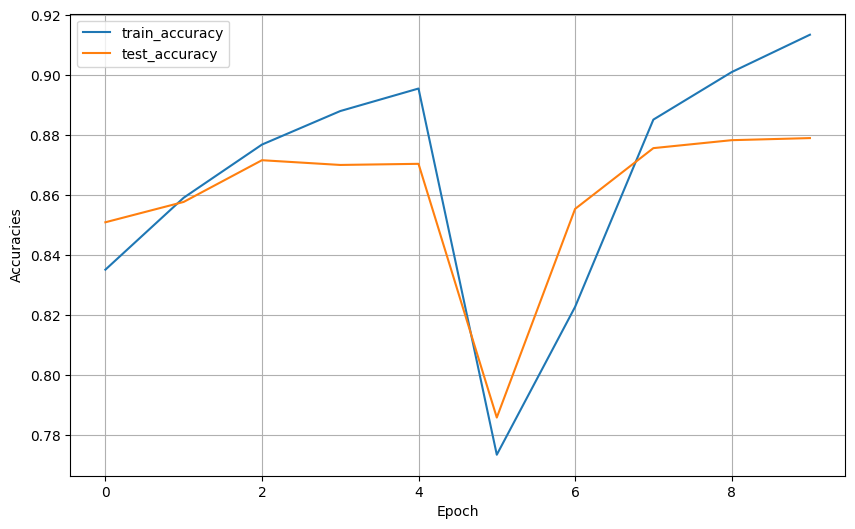

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(metrics['train_accs'],label='train_accuracy')
ax.plot(metrics['valid_accs'],label='test_accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracies')
ax.legend()
ax.grid()

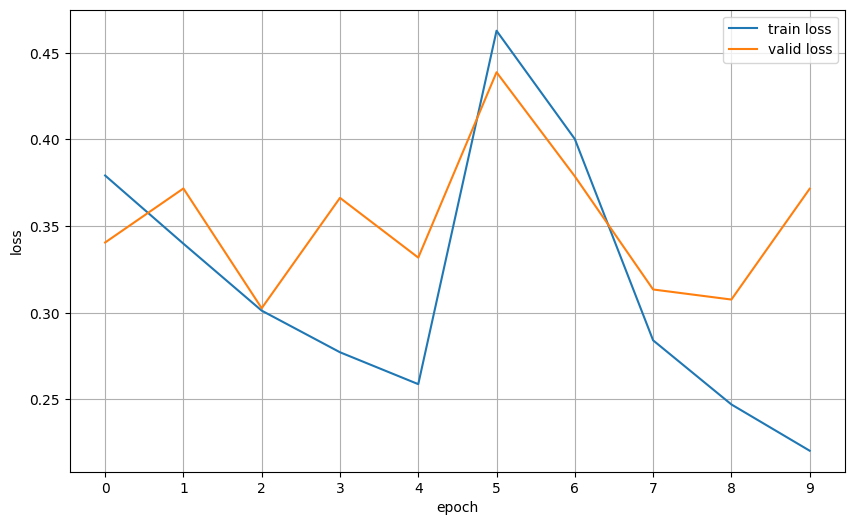

In [ ]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_losses"], label="train loss")
ax.plot(metrics["valid_losses"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

In [ ]:
model.load_state_dict(torch.load("lstm.pt"))

test_loss, test_acc = evaluate(model,test_data_loader, criterion, device)


testing...: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]


(np.float64(0.3099548758900895), np.float64(0.8676282130942052))

In [ ]:
test_loss.item(),test_acc.item()

(0.3099548758900895, 0.8676282130942052)

In [ ]:
def predict_sentiment(text,vocab,model,tokenizer,device):
  token = tokenizer(text)
  idx = vocab.lookup_indices(token)
  length = torch.LongTensor([len(idx)])
  tensor = torch.LongTensor(idx).unsqueeze(0).to(device)
  pred = model(tensor,length).squeeze(0)
  probs = torch.softmax(pred,dim=-1)
  pred_class = pred.argmax(dim=-1).item()
  pred_prob = probs[pred_class].item()
  return pred_class,pred_prob




In [ ]:
text = "this movie is terrible"

predict_sentiment(text, vocab, model, tokenizer, device)



(0, 0.9187057018280029)